In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [57]:
df.shape

(891, 12)

In [58]:
df.tail()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
886,887,"Montvila, Rev. Juozas",2,male,27.0,0,0,211536,13.00,NaN,S,0
887,888,"Graham, Miss. Margaret Edith",1,female,19.0,0,0,112053,30.00,B42,S,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,0
889,890,"Behr, Mr. Karl Howell",1,male,26.0,0,0,111369,30.00,C148,C,1
890,891,"Dooley, Mr. Patrick",3,male,32.0,0,0,370376,7.75,NaN,Q,0


In [59]:
df[df.duplicated()]

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived


In [60]:
df.drop(['PassengerId','Name','Name','SibSp','Parch','Ticket','Cabin','Embarked','Pclass'],inplace=True,axis=1)

In [61]:
df.head()

,Sex,Age,Fare,Survived
0,male,22.0,7.2500,0
1,female,38.0,71.2833,1
2,female,26.0,7.9250,1
3,female,35.0,53.1000,1
4,male,35.0,8.0500,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sex       891 non-null    object 
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 28.0+ KB


In [63]:
df.isnull().sum()

Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [64]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [65]:
age_mean = df['Age'].mean()
age_mean

29.69911764705882

In [66]:
df['Age'].fillna(age_mean,inplace=True)

In [67]:
df.isnull().sum()

Sex         0
Age         0
Fare        0
Survived    0
dtype: int64

In [68]:
df.head()

,Sex,Age,Fare,Survived
0,male,22.0,7.2500,0
1,female,38.0,71.2833,1
2,female,26.0,7.9250,1
3,female,35.0,53.1000,1
4,male,35.0,8.0500,0


In [69]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df.head()

,Sex,Age,Fare,Survived
0,1,22.0,7.2500,0
1,0,38.0,71.2833,1
2,0,26.0,7.9250,1
3,0,35.0,53.1000,1
4,1,35.0,8.0500,0


<AxesSubplot:>

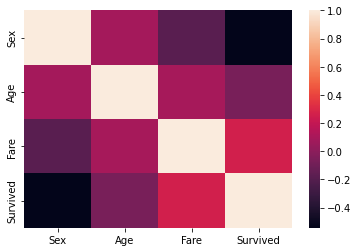

In [70]:
sns.heatmap(df.corr())

In [71]:
x = df.iloc[:,:-1] #independent variable

y = df.iloc[:,-1:] #dependent variable

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
scaled_data = scaler.transform(x)

In [74]:
x = pd.DataFrame(scaled_data,columns=['Sex','Age','Fare'])
x

,Sex,Age,Fare
0,0.737695,-0.592481,-0.502445
1,-1.355574,0.638789,0.786845
2,-1.355574,-0.284663,-0.488854
3,-1.355574,0.407926,0.420730
4,0.737695,0.407926,-0.486337
...,...,...,...
886,0.737695,-0.207709,-0.386671
887,-1.355574,-0.823344,-0.044381
888,-1.355574,0.000000,-0.176263
889,0.737695,-0.284663,-0.044381


In [75]:
#split data into training and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=1)

# Logistic Regression

In [76]:
#Here we use logistic Regression Algorithm to trian model
from sklearn.linear_model import LogisticRegression
logi_regg = LogisticRegression()
logi_regg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [77]:
#predict the test data
y_pred_logi = logi_regg.predict(x_test)

In [78]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_logi = accuracy_score(y_test,y_pred_logi)
print('Accuracy of model is : ',score_logi)

error_logi = confusion_matrix(y_test,y_pred_logi)
print("Correct and Incorrect input data :'\n'", error_logi)

Accuracy of model is :  0.7784011220196353
Correct and Incorrect input data :'
' [[360  72]
 [ 86 195]]


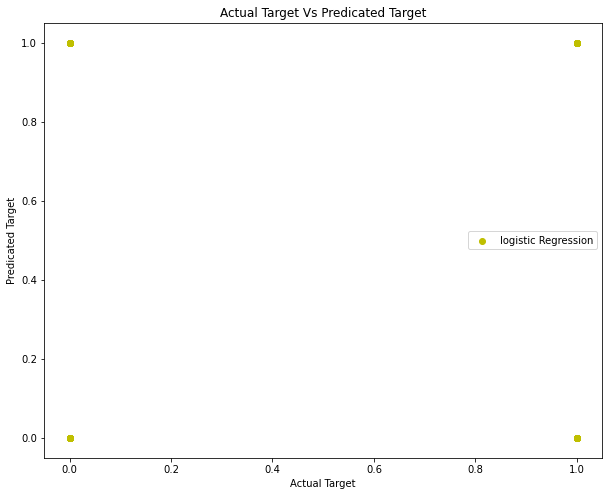

In [79]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# K-Nearest Neighbours

In [80]:
from sklearn.neighbors import KNeighborsClassifier
list1 = []
list2 = []
for i in range(3,50,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    from sklearn.metrics import accuracy_score
    y_pred = knn.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    list1.append(score)
    list2.append(i)
print(list1)
print(list2)
#print(i)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

[0.7433380084151473, 0.7335203366058906, 0.7251051893408135, 0.7335203366058906, 0.7377279102384292, 0.7349228611500701, 0.7699859747545582, 0.7741935483870968, 0.7784011220196353, 0.7798036465638148, 0.7769985974754559, 0.7755960729312763, 0.7755960729312763, 0.7755960729312763, 0.7741935483870968, 0.7741935483870968, 0.7741935483870968, 0.7741935483870968, 0.7755960729312763, 0.7769985974754559, 0.7769985974754559, 0.7784011220196353, 0.7798036465638148, 0.7840112201963534]
[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]


In [82]:
df = pd.DataFrame(list1,columns=['score'])
df['k_values'] = list2
df

,score,k_values
0,0.743338,3
1,0.733520,5
2,0.725105,7
3,0.733520,9
4,0.737728,11
5,0.734923,13
6,0.769986,15
7,0.774194,17
8,0.778401,19
9,0.779804,21


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='k_values', ylabel='score'>

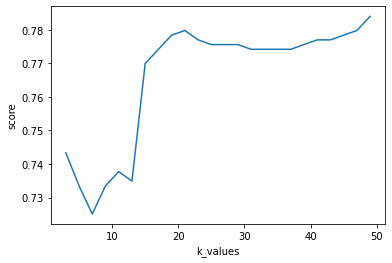

In [83]:
#here we plot the line graph
sns.lineplot(df.k_values,df.score)
#df.plot(x = 'k_values',y='score',kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


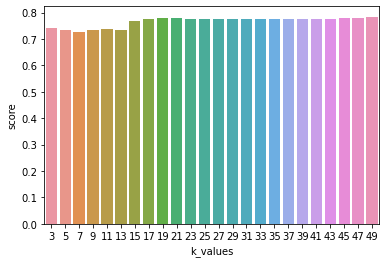

In [84]:
#df.plot(x = 'mse',y='k_values',kind='bar')
sns.barplot(df.k_values,df.score)
plt.show()

In [85]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [86]:
y_pred_knn = knn.predict(x_test)

In [87]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy of model is : ',score_knn)

error_knn = confusion_matrix(y_test,y_pred_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

Accuracy of model is :  0.7433380084151473
Correct and Incorrect input data :'
' [[346  86]
 [ 97 184]]


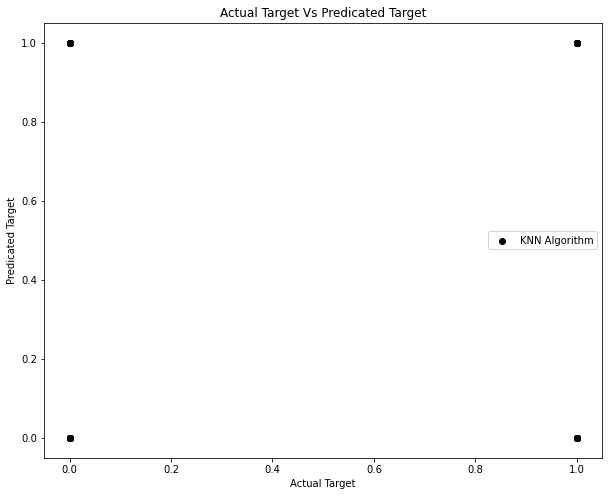

In [88]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Support Vector Machine Algorithm

In [90]:
from sklearn import svm
#from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
kernel_name = ['linear', 'poly', 'rbf','sigmoid'] #{'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
score_store = []
for i in kernel_name:
    cv_classification = svm.SVC(kernel=i)#SVC = support vector classifier
    cv_classification.fit(x_train,y_train)
    y_pred = cv_classification.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    score_store.append(score)
score_store

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

[0.782608695652174, 0.7699859747545582, 0.7741935483870968, 0.6984572230014026]

In [91]:
df1 = pd.DataFrame(score_store,columns=['score'])
df1['kernal'] = kernel_name
df1

,score,kernal
0,0.782609,linear
1,0.769986,poly
2,0.774194,rbf
3,0.698457,sigmoid


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kernal', ylabel='score'>

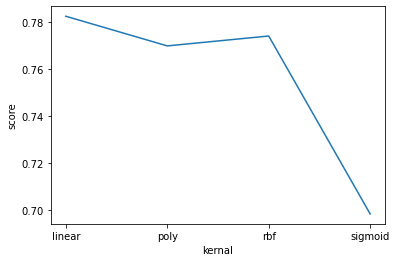

In [92]:
#here we plot the line graph
sns.lineplot(df1.kernal,df1.score)
#df1.plot(x = 'kernal',y='score',kind='line')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


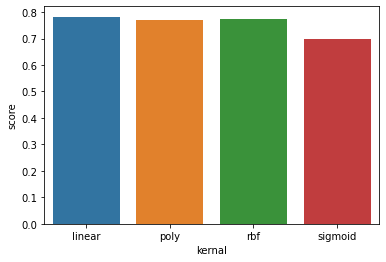

In [93]:
#df1.plot(x = 'score',y='k_values',kind='bar')
sns.barplot(df1.kernal,df1.score)
plt.show()

In [94]:
#Used support vector machine
cv_classification = svm.SVC(kernel='linear')    #SVC = support vector classifier
cv_classification.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(kernel='linear')

In [95]:
y_pred_svm = cv_classification.predict(x_test)

In [96]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of model is : ',score_svm)

error_svm = confusion_matrix(y_test,y_pred_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

Accuracy of model is :  0.782608695652174
Correct and Incorrect input data :'
' [[367  65]
 [ 90 191]]


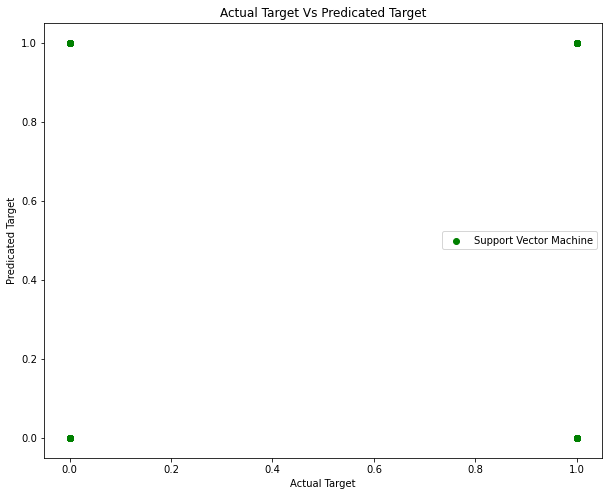

In [97]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Decision Tree Classification Algorithm

In [98]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy') # entropy = information gain
dt_classifier.fit(x_train,y_train) 

DecisionTreeClassifier(criterion='entropy')

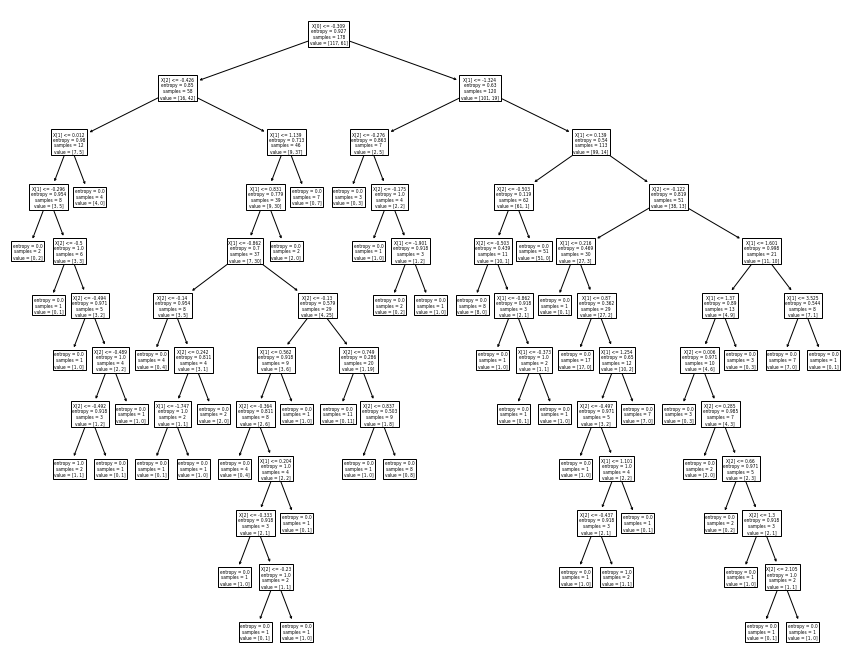

In [99]:
from sklearn import tree
fig = plt.figure(figsize=(15,12))
x=tree.plot_tree(dt_classifier)

In [100]:
y_pred_dt = dt_classifier.predict(x_test)

In [101]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy of model is : ',score_dt)

error_dt = confusion_matrix(y_test,y_pred_dt)
print("Correct and Incorrect input data :'\n'", error_dt)

Accuracy of model is :  0.7321178120617111
Correct and Incorrect input data :'
' [[358  74]
 [117 164]]


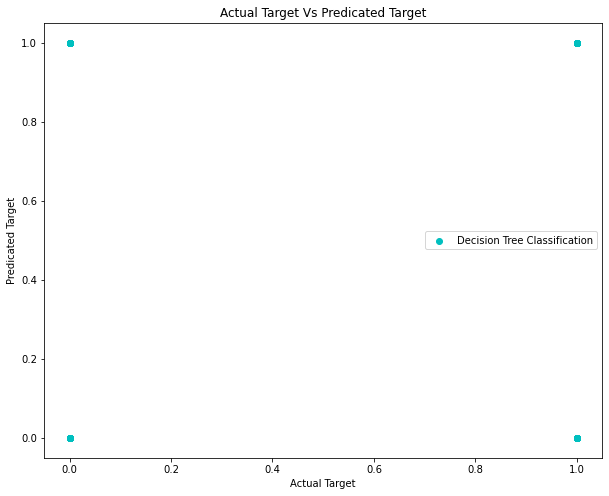

In [102]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Navie Bayer Classification Algorithm

In [103]:
from sklearn.naive_bayes import GaussianNB
NBCA = GaussianNB()
NBCA.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [104]:
y_pred_nb = NBCA.predict(x_test)

In [105]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_nb = accuracy_score(y_test,y_pred_nb)
print('Accuracy of model is : ',score_nb)

error_nb = confusion_matrix(y_test,y_pred_nb)
print("Correct and Incorrect input data :'\n'", error_nb)

Accuracy of model is :  0.7727910238429172
Correct and Incorrect input data :'
' [[350  82]
 [ 80 201]]


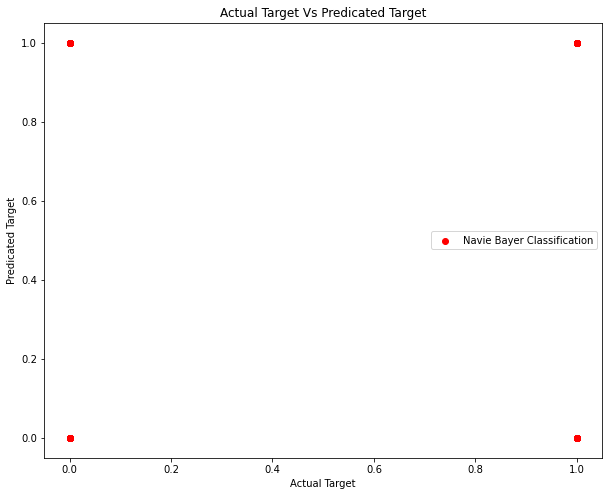

In [106]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# Random Forest Classification Algorithm

In [107]:
from sklearn.ensemble import RandomForestClassifier
RFAClass = RandomForestClassifier(n_estimators=50) #n_estimators less error maximum and more error less
RFAClass.fit(x_train,y_train)
RFAClass.fit(x_train,y_train)

C:\Users\vbkat\AppData\Local\Temp/ipykernel_18944/1543761169.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFAClass.fit(x_train,y_train)
C:\Users\vbkat\AppData\Local\Temp/ipykernel_18944/1543761169.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFAClass.fit(x_train,y_train)


RandomForestClassifier(n_estimators=50)

In [108]:
y_pred_rf = RFAClass.predict(x_test)

In [109]:
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of model is : ',score_rf)

error_rf = confusion_matrix(y_test,y_pred_rf)
print("Correct and Incorrect input data :'\n'", error_rf)

Accuracy of model is :  0.7433380084151473
Correct and Incorrect input data :'
' [[362  70]
 [113 168]]


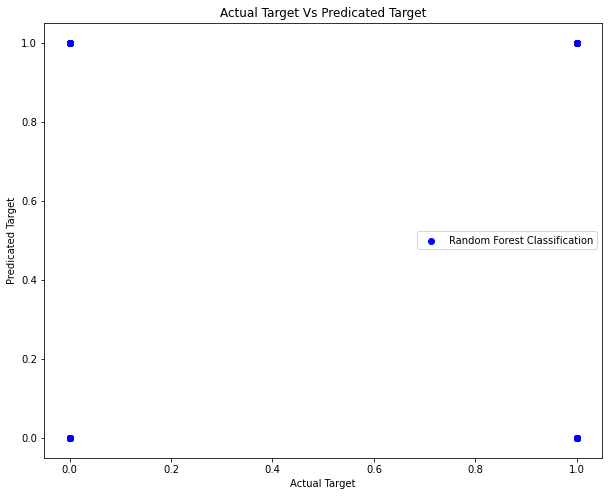

In [110]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()

# All Classification Type algorithm result


In [111]:
print('Logistic Regression')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_logi = accuracy_score(y_test,y_pred_logi)
print('Accuracy of model is : ',score_logi)

error_logi = confusion_matrix(y_test,y_pred_logi)
print("Correct and Incorrect input data :'\n'", error_logi)


print('\n KNN Classification')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy of model is : ',score_knn)

error_knn = confusion_matrix(y_test,y_pred_knn)
print("Correct and Incorrect input data :'\n'", error_knn)

print('\n Support Vector Machine classification Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_svm = accuracy_score(y_test,y_pred_svm)
print('Accuracy of model is : ',score_svm)

error_svm = confusion_matrix(y_test,y_pred_svm)
print("Correct and Incorrect input data :'\n'", error_svm)

print('\n Decision Tree Classifcation Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy of model is : ',score_dt)

error_dt = confusion_matrix(y_test,y_pred_dt)
print("Correct and Incorrect input data :'\n'", error_dt)
      
      

print('\n Navie Bayes Classification Algorithms')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_nb = accuracy_score(y_test,y_pred_nb)
print('Accuracy of model is : ',score_nb)

error_nb = confusion_matrix(y_test,y_pred_nb)
print("Correct and Incorrect input data :'\n'", error_nb)
      
      
print('\n Random Forest classification Algorithm')
#Here we check the accuracy of model with the help of accuracy score and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
score_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy of model is : ',score_rf)

error_rf = confusion_matrix(y_test,y_pred_rf)
print("Correct and Incorrect input data :'\n'", error_rf)

Logistic Regression
Accuracy of model is :  0.7784011220196353
Correct and Incorrect input data :'
' [[360  72]
 [ 86 195]]

 KNN Classification
Accuracy of model is :  0.7433380084151473
Correct and Incorrect input data :'
' [[346  86]
 [ 97 184]]

 Support Vector Machine classification Algorithm
Accuracy of model is :  0.782608695652174
Correct and Incorrect input data :'
' [[367  65]
 [ 90 191]]

 Decision Tree Classifcation Algorithm
Accuracy of model is :  0.7321178120617111
Correct and Incorrect input data :'
' [[358  74]
 [117 164]]

 Navie Bayes Classification Algorithms
Accuracy of model is :  0.7727910238429172
Correct and Incorrect input data :'
' [[350  82]
 [ 80 201]]

 Random Forest classification Algorithm
Accuracy of model is :  0.7433380084151473
Correct and Incorrect input data :'
' [[362  70]
 [113 168]]


In [112]:
Algorithm = ['Logistic Regression','K-NN','Support VM','Decision Tree','Navie Bayer','Random Forest']
score = [score_logi,score_knn,score_svm,score_dt,score_nb,score_rf]
df_plot = pd.DataFrame(Algorithm,columns=['Algorithm_Name'])
df_plot['Accuracy_Score']=score
df_plot

,Algorithm_Name,Accuracy_Score
0,Logistic Regression,0.778401
1,K-NN,0.743338
2,Support VM,0.782609
3,Decision Tree,0.732118
4,Navie Bayer,0.772791
5,Random Forest,0.743338


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


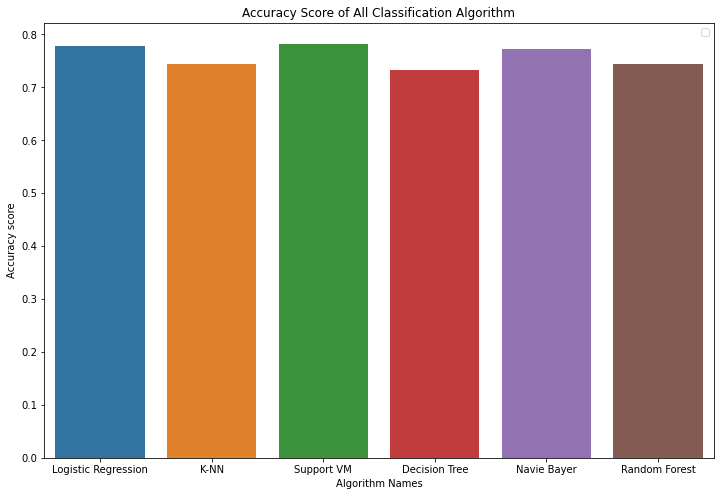

In [113]:
plt.figure(figsize=(12,8))
sns.barplot(df_plot.Algorithm_Name,df_plot.Accuracy_Score)
plt.xlabel('Algorithm Names')
plt.ylabel('Accuracy score')
plt.title('Accuracy Score of All Classification Algorithm')
plt.legend()

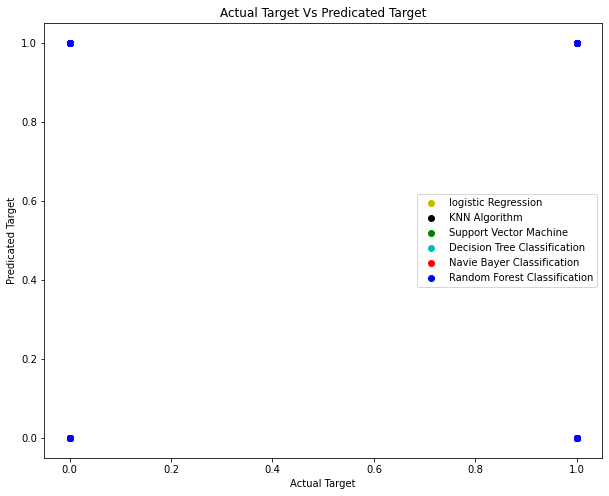

In [114]:
#visulation of the Acutal Target and Predicated target
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_pred_logi,c='y',label='logistic Regression')
plt.scatter(y_test,y_pred_knn,c='k',label='KNN Algorithm')
plt.scatter(y_test,y_pred_svm,c='g',label='Support Vector Machine')
plt.scatter(y_test,y_pred_dt,c='c',label='Decision Tree Classification')
plt.scatter(y_test,y_pred_nb,c='r',label='Navie Bayer Classification')
plt.scatter(y_test,y_pred_rf,c='b',label='Random Forest Classification')
plt.xlabel('Actual Target')
plt.ylabel('Predicated Target')
plt.title('Actual Target Vs Predicated Target')
plt.legend()
plt.show()